In [1]:
import time
start_time=time.time()

Power Spectrum: Obtaining the 1DPSD.

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import pickle

import scipy.fftpack
from astropy.io import fits
import astropy.units as u
#Methods
from scipy import ndimage
from radial_data import radial_data
import radialProfile
from turbustat.statistics import PowerSpectrum 

Data

In [3]:
data=pd.read_table('datos.txt')

In [4]:
data_2=(data.round(2)).pivot(index='Y', columns='X', values='RV')

2D Fourier Transform 

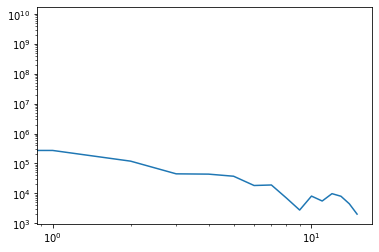

In [5]:
data_2=(data.round(2)).pivot(index='Y', columns='X', values='RV')
dataFT=data_2
FT2a=scipy.fftpack.fft2(dataFT)
power_s0=np.abs(FT2a)
FT2 = scipy.fftpack.fftshift(FT2a)
power_s = np.abs(FT2)**2

h  = power_s.shape[0]
w  = power_s.shape[1]
wc = w//2
hc = h//2

# create an array of integer radial distances from the center
Y, X = np.ogrid[0:h, 0:w]
r    = np.hypot(X - wc, Y - hc).astype(np.int)
rdf=pd.DataFrame(r)

psdf=pd.DataFrame(power_s)
data_ps=dict()
for i in range(wc):
    m=(rdf==i)
    psm=psdf[m]
    s=(psm.mean()).mean()
    err=(psm.std()/np.sqrt(len(psm))).mean()
    data_ps[i]=[i,s,err]
    
psd1D_2mx=pd.DataFrame(data_ps).T
norm=psd1D_2mx
plt.loglog(psd1D_2mx[1])

C:\Users\ZAINTEL2\anaconda3\lib\site-packages\turbustat\statistics\base_statistic.py:66: UserWarning: Header missing beam information.
  warn("Header missing beam information.")
C:\Users\ZAINTEL2\anaconda3\lib\site-packages\scipy\stats\stats.py:1603: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=18
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "
C:\Users\ZAINTEL2\anaconda3\lib\site-packages\turbustat\statistics\elliptical_powerlaw.py:249: RuntimeWarning: divide by zero encountered in log10
  np.log10(x**2 * term1 + x * y * term2 + y**2 * term3)


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.715
Model:                            OLS   Adj. R-squared:                  0.697
Method:                 Least Squares   F-statistic:                     54.33
Date:                Fri, 11 Sep 2020   Prob (F-statistic):           1.58e-06
Time:                        08:44:53   Log-Likelihood:               -0.56080
No. Observations:                  18   AIC:                             5.122
Df Residuals:                      16   BIC:                             6.902
Df Model:                           1                                         
Covariance Type:                  HC3                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.0938      0.178     17.338      0.0

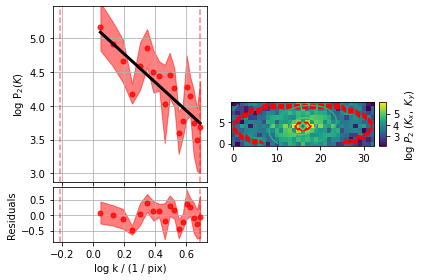

In [6]:
powerfits=fits.PrimaryHDU(dataFT)
normts=PowerSpectrum(powerfits, distance=840000*u.pc)
normts.run(verbose=True,use_wavenumber=True)

Interpolate

In [7]:
pickle_in = open("604IHAH.pkl","rb")
data2 = pickle.load(pickle_in)

In [8]:
datavr2=data2[0].pivot(index='Y', columns='X', values='RV')
datavr2=datavr2.interpolate(method='linear',limit_direction ='both')

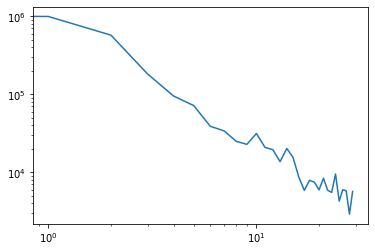

In [9]:
dataFT=datavr2
FT2a=scipy.fftpack.fft2(dataFT)
power_s0=np.abs(FT2a)
FT2 = scipy.fftpack.fftshift(FT2a)
power_s = np.abs(FT2)**2

h  = power_s.shape[0]
w  = power_s.shape[1]
wc = w//2
hc = h//2

# create an array of integer radial distances from the center
Y, X = np.ogrid[0:h, 0:w]
r    = np.hypot(X - wc, Y - hc).astype(np.int)
rdf=pd.DataFrame(r)

psdf=pd.DataFrame(power_s)
data_ps=dict()
for i in range(wc):
    m=(rdf==i)
    psm=psdf[m]
    s=(psm.mean()).mean()
    err=(psm.std()/np.sqrt(len(psm))).mean()
    data_ps[i]=[i,s,err]
    
psd1D_2mx=pd.DataFrame(data_ps).T
intp=psd1D_2mx
plt.loglog(psd1D_2mx[1])

C:\Users\ZAINTEL2\anaconda3\lib\site-packages\turbustat\statistics\base_statistic.py:66: UserWarning: Header missing beam information.
  warn("Header missing beam information.")


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.426
Model:                            OLS   Adj. R-squared:                  0.406
Method:                 Least Squares   F-statistic:                     19.81
Date:                Fri, 11 Sep 2020   Prob (F-statistic):           0.000116
Time:                        08:44:56   Log-Likelihood:                -13.634
No. Observations:                  31   AIC:                             31.27
Df Residuals:                      29   BIC:                             34.14
Df Model:                           1                                         
Covariance Type:                  HC3                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.3837      0.199     17.032      0.0

C:\Users\ZAINTEL2\anaconda3\lib\site-packages\turbustat\statistics\elliptical_powerlaw.py:249: RuntimeWarning: divide by zero encountered in log10
  np.log10(x**2 * term1 + x * y * term2 + y**2 * term3)


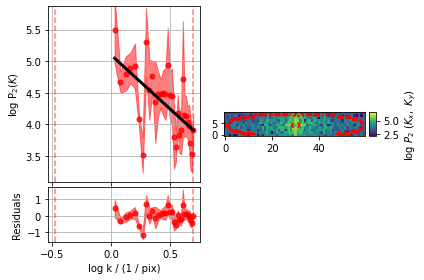

In [10]:
powerfits=fits.PrimaryHDU(dataFT)
intpts=PowerSpectrum(powerfits, distance=840000*u.pc)
intpts.run(verbose=True,use_wavenumber=True)

Fill

In [11]:
pickle_in = open("604IHCH.pkl","rb")
data3 = pickle.load(pickle_in)

In [12]:
datavr3=data3[0].pivot(index='Y', columns='X', values='RV')

In [13]:
datavr3x=datavr3.fillna(value=100)

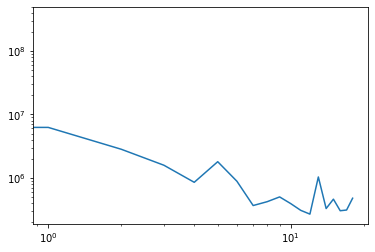

In [14]:
dataFT=datavr3x
FT2a=scipy.fftpack.fft2(dataFT)
power_s0=np.abs(FT2a)
FT2 = scipy.fftpack.fftshift(FT2a)
power_s = np.abs(FT2)**2

h  = power_s.shape[0]
w  = power_s.shape[1]
wc = w//2
hc = h//2

# create an array of integer radial distances from the center
Y, X = np.ogrid[0:h, 0:w]
r    = np.hypot(X - wc, Y - hc).astype(np.int)
rdf=pd.DataFrame(r)

psdf=pd.DataFrame(power_s)
data_ps=dict()
for i in range(wc):
    m=(rdf==i)
    psm=psdf[m]
    s=(psm.mean()).mean()
    err=(psm.std()/np.sqrt(len(psm))).mean()
    data_ps[i]=[i,s,err]
    
psd1D_2mx=pd.DataFrame(data_ps).T
fll=psd1D_2mx
plt.loglog(psd1D_2mx[1])

C:\Users\ZAINTEL2\anaconda3\lib\site-packages\turbustat\statistics\base_statistic.py:66: UserWarning: Header missing beam information.
  warn("Header missing beam information.")


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.686
Model:                            OLS   Adj. R-squared:                  0.669
Method:                 Least Squares   F-statistic:                     36.93
Date:                Fri, 11 Sep 2020   Prob (F-statistic):           7.63e-06
Time:                        08:44:58   Log-Likelihood:                 6.3833
No. Observations:                  21   AIC:                            -8.767
Df Residuals:                      19   BIC:                            -6.678
Df Model:                           1                                         
Covariance Type:                  HC3                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.1408      0.106     48.488      0.0

C:\Users\ZAINTEL2\anaconda3\lib\site-packages\turbustat\statistics\elliptical_powerlaw.py:249: RuntimeWarning: divide by zero encountered in log10
  np.log10(x**2 * term1 + x * y * term2 + y**2 * term3)


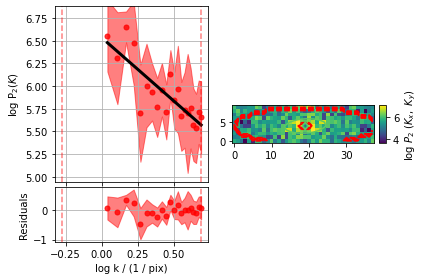

In [15]:
powerfits=fits.PrimaryHDU(dataFT)
fllts=PowerSpectrum(powerfits, distance=840000*u.pc)
fllts.run(verbose=True,use_wavenumber=True)

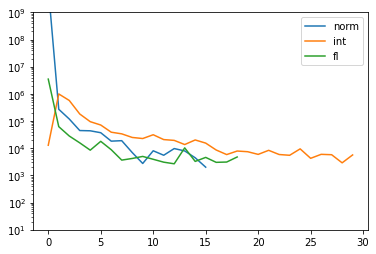

In [16]:
plt.semilogy(norm[1],label='norm')
plt.semilogy(intp[1],label='int')
plt.semilogy(fll[1]/100,label='fl')
plt.ylim(10*1, 10**9) 
plt.legend()

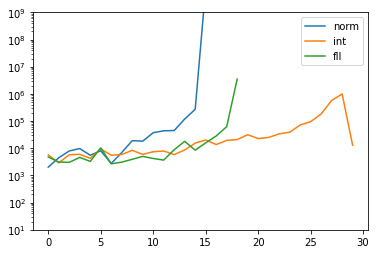

In [17]:
array=np.array(norm[1])[::-1] 

plt.semilogy(np.array(norm[1])[::-1],label='norm')
plt.semilogy(np.array(intp[1])[::-1],label='int')
plt.semilogy(np.array(fll[1]/100)[::-1],label='fll')
plt.ylim(10*1, 10**9) 
plt.legend()


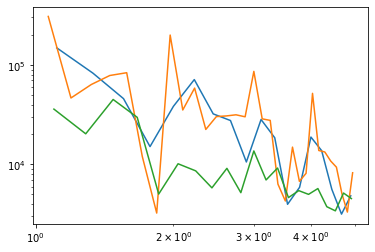

In [18]:
plt.loglog(normts.wavenumbers,normts.ps1D)
plt.loglog(intpts.wavenumbers,intpts.ps1D)
plt.loglog(fllts.wavenumbers,fllts.ps1D/100)

In [19]:
np.pi

3.141592653589793

In [20]:
fllts.wavenumbers

<Quantity [1.0952381 , 1.28571429, 1.47619048, 1.66666667, 1.85714286,
           2.04761905, 2.23809524, 2.42857143, 2.61904762, 2.80952381,
           3.        , 3.19047619, 3.38095238, 3.57142857, 3.76190476,
           3.95238095, 4.14285714, 4.33333333, 4.52380952, 4.71428571,
           4.9047619 ] 1 / pix>

In [21]:
2*np.pi*(fllts.wavenumbers**-1)

<Quantity [5.73682137, 4.88692191, 4.25635134, 3.76991118, 3.38325363,
           3.06853236, 2.80738067, 2.58719395, 2.39903439, 2.23638799,
           2.0943951 , 1.96935659, 1.85840692, 1.75929189, 1.67021382,
           1.58972158, 1.51663094, 1.44996584, 1.38891465, 1.33279688,
           1.28103778] pix>

In [22]:
2*np.pi*(fllts.wavenumbers**-1)*4.16

<Quantity [23.86517689, 20.32959513, 17.70642156, 15.68283053, 14.07433509,
           12.76509461, 11.67870358, 10.76272683,  9.97998306,  9.30337404,
            8.71268363,  8.19252341,  7.73097279,  7.31865425,  6.94808947,
            6.61324179,  6.30918469,  6.03185789,  5.77788493,  5.54443503,
            5.32911717] pix>

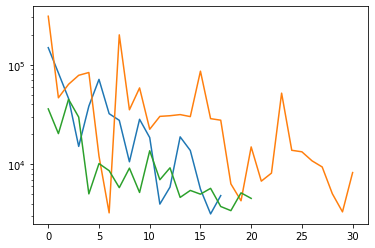

In [23]:
plt.semilogy(normts.ps1D)
plt.semilogy(intpts.ps1D)
plt.semilogy(fllts.ps1D/100)

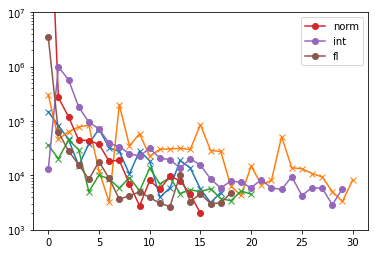

In [24]:
plt.semilogy(normts.ps1D,marker='x')
plt.semilogy(intpts.ps1D,marker='x')
plt.semilogy(fllts.ps1D/100,marker='x')

plt.semilogy(norm[1],label='norm',marker='o')
plt.semilogy(intp[1],label='int',marker='o')
plt.semilogy(fll[1]/100,label='fl',marker='o')
plt.ylim(10**3, 10**7) 
plt.legend()

Taurus

In [25]:
FitsFile= 'TAURUS.604.Ha.RV'
hdul=fits.open(FitsFile + '.fits')
vel=hdul[0].data
df=pd.DataFrame(vel)
dfvr=df.stack().reset_index().rename(columns={'level_0':'Y', 'level_1':'X', 0:'RV'})
dfv=(dfvr.round(2)).pivot(index='Y', columns='X', values='RV')

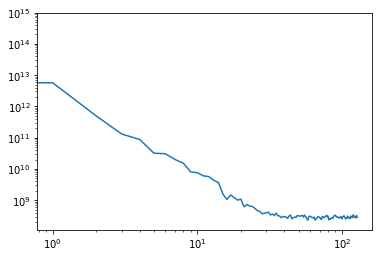

In [26]:
dataFT=dfv
FT2a=scipy.fftpack.fft2(dataFT)
power_s0=np.abs(FT2a)
FT2 = scipy.fftpack.fftshift(FT2a)
power_s = np.abs(FT2)**2

h  = power_s.shape[0]
w  = power_s.shape[1]
wc = w//2
hc = h//2

# create an array of integer radial distances from the center
Y, X = np.ogrid[0:h, 0:w]
r    = np.hypot(X - wc, Y - hc).astype(np.int)
rdf=pd.DataFrame(r)

psdf=pd.DataFrame(power_s)
data_ps=dict()
for i in range(wc):
    m=(rdf==i)
    psm=psdf[m]
    s=(psm.mean()).mean()
    err=(psm.std()/np.sqrt(len(psm))).mean()
    data_ps[i]=[i,s,err]
    
psd1D_2mx=pd.DataFrame(data_ps).T
tau1=psd1D_2mx
plt.loglog(psd1D_2mx[1])

C:\Users\ZAINTEL2\anaconda3\lib\site-packages\turbustat\statistics\base_statistic.py:66: UserWarning: Header missing beam information.
  warn("Header missing beam information.")
C:\Users\ZAINTEL2\anaconda3\lib\site-packages\numpy\lib\nanfunctions.py:1666: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.766
Model:                            OLS   Adj. R-squared:                  0.765
Method:                 Least Squares   F-statistic:                     157.0
Date:                Fri, 11 Sep 2020   Prob (F-statistic):           2.89e-26
Time:                        08:45:06   Log-Likelihood:                -33.590
No. Observations:                 181   AIC:                             71.18
Df Residuals:                     179   BIC:                             77.58
Df Model:                           1                                         
Covariance Type:                  HC3                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.7006      0.070    110.223      0.0

C:\Users\ZAINTEL2\anaconda3\lib\site-packages\turbustat\statistics\elliptical_powerlaw.py:249: RuntimeWarning: divide by zero encountered in log10
  np.log10(x**2 * term1 + x * y * term2 + y**2 * term3)


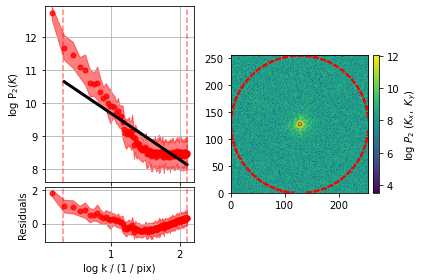

In [27]:
powerfits=fits.PrimaryHDU(dataFT)
tau1ts=PowerSpectrum(powerfits, distance=840000*u.pc)
tau1ts.run(verbose=True,use_wavenumber=True)

In [28]:
pickle_in = open("604THBH.pkl","rb")
data = pickle.load(pickle_in)

In [29]:
datavr=data[0].pivot(index='Y', columns='X', values='RV')

In [30]:
datavr=datavr.fillna(value=100)

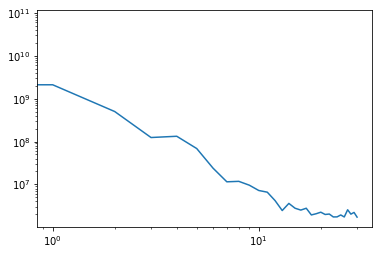

In [31]:
dataFT=datavr
FT2a=scipy.fftpack.fft2(dataFT)
power_s0=np.abs(FT2a)
FT2 = scipy.fftpack.fftshift(FT2a)
power_s = np.abs(FT2)**2

h  = power_s.shape[0]
w  = power_s.shape[1]
wc = w//2
hc = h//2

# create an array of integer radial distances from the center
Y, X = np.ogrid[0:h, 0:w]
r    = np.hypot(X - wc, Y - hc).astype(np.int)
rdf=pd.DataFrame(r)

psdf=pd.DataFrame(power_s)
data_ps=dict()
for i in range(wc):
    m=(rdf==i)
    psm=psdf[m]
    s=(psm.mean()).mean()
    err=(psm.std()/np.sqrt(len(psm))).mean()
    data_ps[i]=[i,s,err]
    
psd1D_2mx=pd.DataFrame(data_ps).T
tau1=psd1D_2mx
plt.loglog(psd1D_2mx[1])

C:\Users\ZAINTEL2\anaconda3\lib\site-packages\turbustat\statistics\base_statistic.py:66: UserWarning: Header missing beam information.
  warn("Header missing beam information.")


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.892
Model:                            OLS   Adj. R-squared:                  0.890
Method:                 Least Squares   F-statistic:                     185.2
Date:                Fri, 11 Sep 2020   Prob (F-statistic):           2.25e-17
Time:                        08:45:09   Log-Likelihood:                 5.9364
No. Observations:                  46   AIC:                            -7.873
Df Residuals:                      44   BIC:                            -4.215
Df Model:                           1                                         
Covariance Type:                  HC3                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.3715      0.098     54.914      0.0

C:\Users\ZAINTEL2\anaconda3\lib\site-packages\turbustat\statistics\elliptical_powerlaw.py:249: RuntimeWarning: divide by zero encountered in log10
  np.log10(x**2 * term1 + x * y * term2 + y**2 * term3)


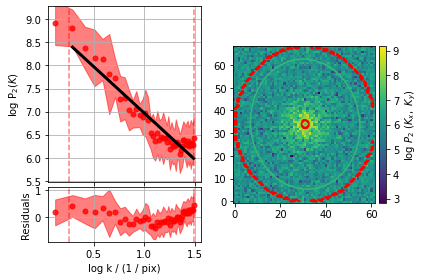

In [32]:
powerfits=fits.PrimaryHDU(dataFT)
tau2ts=PowerSpectrum(powerfits, distance=840000*u.pc)
tau2ts.run(verbose=True,use_wavenumber=True)

In [33]:
print("--- %s seconds ---" % (time.time()-start_time))

--- 22.5632483959198 seconds ---
